# recurrent neural networks

In [1]:
from tensorflow import keras as keras

## recurrent layer in Keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


为了提高网络的表示能力，将多个循环层逐个堆叠有时也是很有用的。在这种情况下，你需要让所有中间层都返回完整的输出序列

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


IMDB 电影评论分类

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

W1017 14:26:56.763873 140735720936320 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.6212 - acc: 0.6459 - val_loss: 0.4890 - val_acc: 0.7926
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.3976 - acc: 0.8345 - val_loss: 0.4928 - val_acc: 0.7812
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.2837 - acc: 0.8896 - val_loss: 0.3792 - val_acc: 0.8584
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.2167 - acc: 0.9186 - val_loss: 0.3949 - val_acc: 0.8272
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.1529 - acc: 0.9435 - val_loss: 0.4223 - val_acc: 0.8280
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.1008 - acc: 0.9658 - val_loss: 0.4249 - val_acc: 0.8452
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.0674 - acc: 0.9789 - val_loss: 0.6

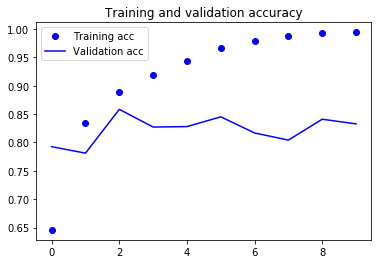

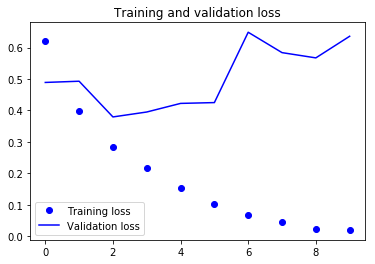

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM example in Keras

In [8]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 47s 2ms/sample - loss: 0.5045 - acc: 0.7653 - val_loss: 0.3349 - val_acc: 0.8722
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2979 - acc: 0.8872 - val_loss: 0.3062 - val_acc: 0.8812
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2354 - acc: 0.9107 - val_loss: 0.3308 - val_acc: 0.8600
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/sample - loss: 0.2023 - acc: 0.9257 - val_loss: 0.2905 - val_acc: 0.8764
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.1785 - acc: 0.9359 - val_loss: 0.2929 - val_acc: 0.8832
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.1559 - acc: 0.9455 - val_loss: 0.4417 - val_acc: 0.8598
Epoch 7/10
20000/20000 [==============================] - 43s 2ms/sample - loss: 0.1406 - acc: 0.9503 - val_loss: 0.5

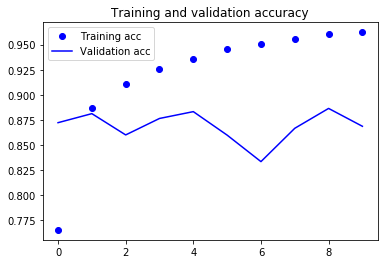

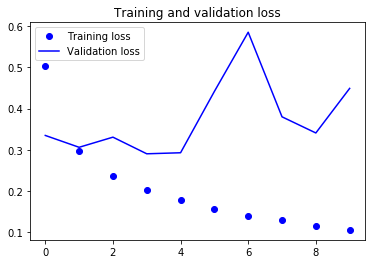

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()